# Customer Review Analysis For Leading woman clothing E-Commerce Company 

| Column Name         |                  | Description                                       |
|---------------------|------------------|---------------------------------------------------|
| Product ID          |                  | Clothing ID                                       |
| Category            |                  | Product Category                                  |
| Subcategory1        |                  | Product Subcategory Level 1                       |
| SubCategory2        |                  | Product Subcategory Level 2                       |
| Location Customer   |                  | Location                                          |
| Customer Age        |                  | Customer Age                                      |
| Channel             |                  | Channel Used (Web or Mobile)                      |
| Review Title        |                  | Review Title                                      |
| Review Text         |                  | Review Description                                |
| Rating              |                  | Review Rating                                     |
| Recommend Flag      |                  | Customer willing to recommend product or not      |


In [1]:
# Importing necessary Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import Dataset:
df=pd.read_excel('Womens Clothing Reviews Data.xlsx')

In [3]:
df.head()

,Product ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer Age,Review Title,Review Text,Rating,Recommend Flag
0,767,Initmates,Intimate,Intimates,Mumbai,Mobile,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1
1,1080,General,Dresses,Dresses,Bangalore,Mobile,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1


###  Observation:  The Dataset column names are not following the INC rules, fixing it.

In [4]:
df.columns=[i.replace(' ','_') for i in df.columns]

In [5]:
df.columns

Index(['Product_ID', 'Category', 'Subcategory1', 'SubCategory2', 'Location',
       'Channel', 'Customer_Age', 'Review_Title', 'Review_Text', 'Rating',
       'Recommend_Flag'],
      dtype='object')

### Shape of the Dataset

In [6]:
print('THE DATASET HAS',df.shape[0],'NUMBER OF ROWS AND',df.shape[1],'NUMBER OF COLUMNS')

THE DATASET HAS 23486 NUMBER OF ROWS AND 11 NUMBER OF COLUMNS


### Checking null Values

In [7]:
df.isna().sum()/len(df)*100

Product_ID         0.000000
Category           0.059610
Subcategory1       0.059610
SubCategory2       0.059610
Location           0.000000
Channel            0.000000
Customer_Age       0.000000
Review_Title      16.222430
Review_Text        3.597888
Rating             0.000000
Recommend_Flag     0.000000
dtype: float64

Observations:
Columns naming Category, Subcategory1, Subcategory2, Review Title, Review Text having null values.
We should drop them.

In [8]:
df.dropna(inplace=True)

### Checking Datatypes

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19662 entries, 2 to 23485
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product_ID      19662 non-null  int64 
 1   Category        19662 non-null  object
 2   Subcategory1    19662 non-null  object
 3   SubCategory2    19662 non-null  object
 4   Location        19662 non-null  object
 5   Channel         19662 non-null  object
 6   Customer_Age    19662 non-null  int64 
 7   Review_Title    19662 non-null  object
 8   Review_Text     19662 non-null  object
 9   Rating          19662 non-null  int64 
 10  Recommend_Flag  19662 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 1.8+ MB


In [10]:
df['Product_ID']=df['Product_ID'].astype(str)
df['Recommend_Flag']=df['Recommend_Flag'].astype(str)

### Checking Duplicate Values

In [11]:
df.duplicated().sum()

0

No of unique values present in the dataset:

In [12]:
df['Age_group']=np.where(df['Customer_Age']<=18,'Teens',np.where(df['Customer_Age']<=29,'Young_adults',np.where(df['Customer_Age']<=49,'Adults',np.where(df['Customer_Age']<=64,'Mature Adults','Senior'))))

## UNIVARIATE ANALYSIS

##### Checking Number of Unique values in Dataset

In [13]:
for i in df.columns:
    print(i,':',df[i].nunique())

Product_ID : 1095
Category : 3
Subcategory1 : 6
SubCategory2 : 20
Location : 4
Channel : 2
Customer_Age : 77
Review_Title : 13983
Review_Text : 19656
Rating : 5
Recommend_Flag : 2
Age_group : 5


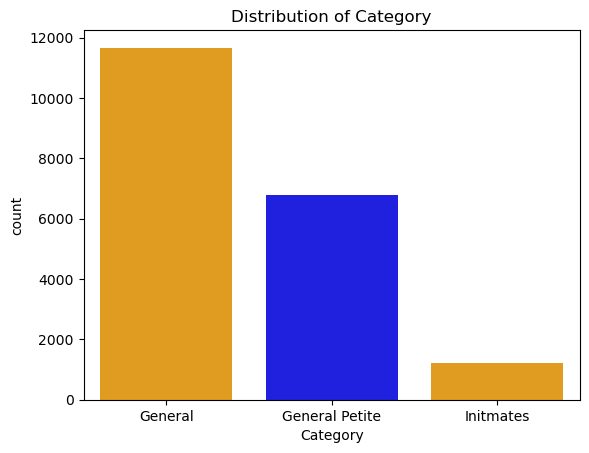

In [14]:
sns.countplot(data=df,x='Category',palette=['orange','blue'])
plt.title('Distribution of Category')
plt.show()

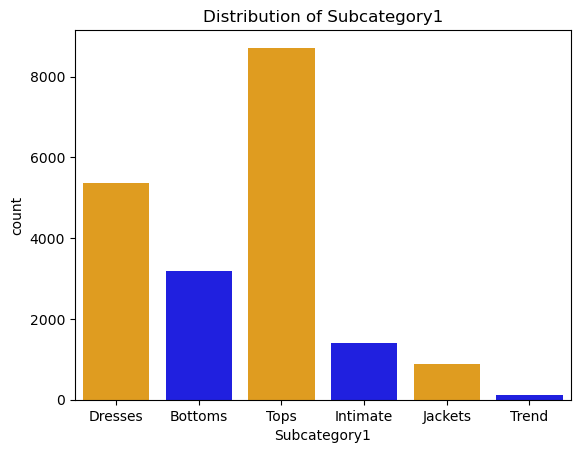

In [15]:
sns.countplot(data=df,x='Subcategory1',palette=['orange','blue'])
plt.title('Distribution of Subcategory1')
plt.show()


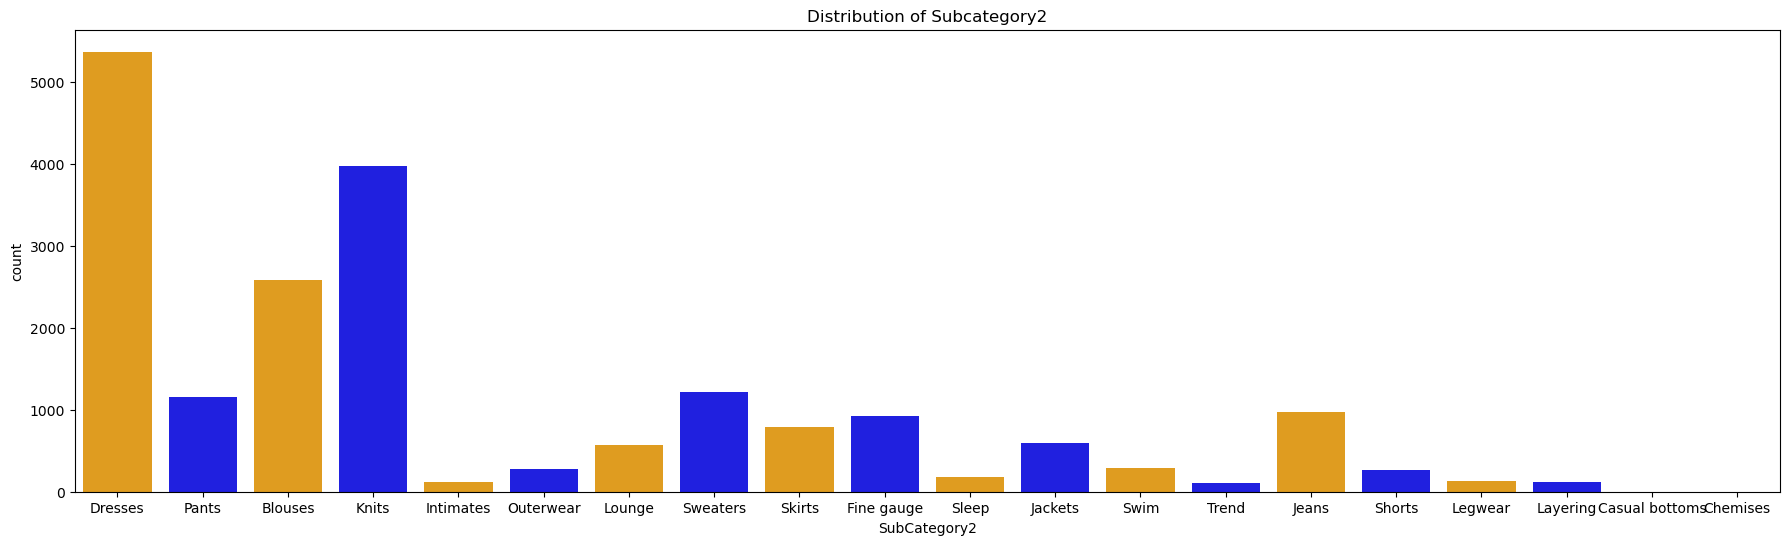

In [16]:
plt.figure(figsize=(22,6))
sns.countplot(data=df,x='SubCategory2',palette=['orange','blue'])
plt.title('Distribution of Subcategory2')
plt.show()

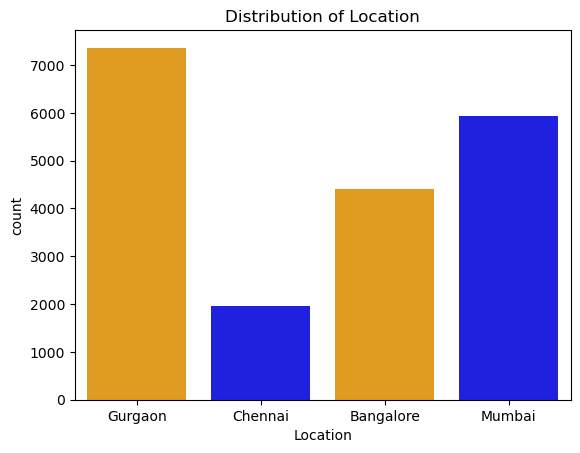

In [17]:
sns.countplot(data=df,x='Location',palette=['orange','blue'])
plt.title('Distribution of Location')
plt.show()

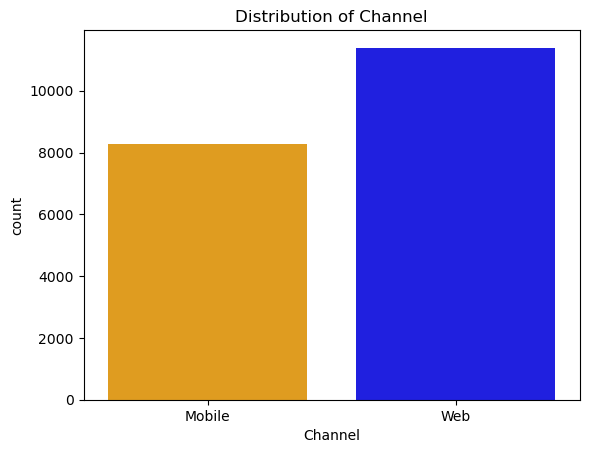

In [18]:
sns.countplot(data=df,x='Channel',palette=['orange','blue'])
plt.title('Distribution of Channel')
plt.show()

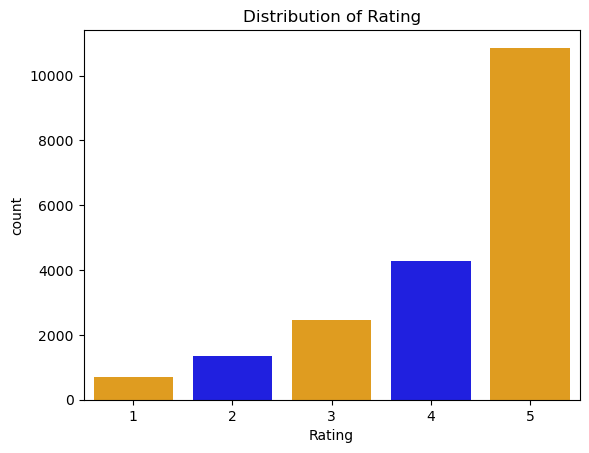

In [19]:
sns.countplot(data=df,x='Rating',palette=['orange','blue'])
plt.title('Distribution of Rating')
plt.show()

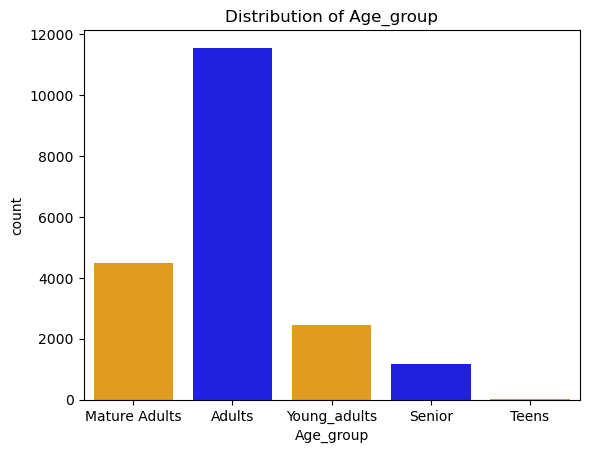

In [20]:
sns.countplot(data=df,x='Age_group',palette=['orange','blue'])
plt.title('Distribution of Age_group')
plt.show()

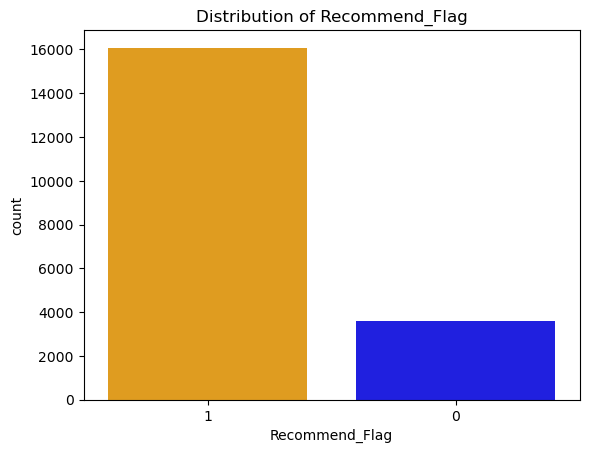

In [21]:
sns.countplot(data=df,x='Recommend_Flag',order=['1','0'],palette=['orange','blue'])
plt.title('Distribution of Recommend_Flag')
plt.show()

# Sentiment Analysis

In [22]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [23]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\soura\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [24]:
sa = SentimentIntensityAnalyzer()

In [25]:
def sentiment_anaysis(text):
    score=sa.polarity_scores(text)
    compound = score['compound']
    if compound > 0.4:
        return 'Positive'
    else:
        return 'Negative'

df['sentiment']=df['Review_Text'].apply(sentiment_anaysis)

In [26]:
df.head()

,Product_ID,Category,Subcategory1,SubCategory2,Location,Channel,Customer_Age,Review_Title,Review_Text,Rating,Recommend_Flag,Age_group,sentiment
2,1077,General,Dresses,Dresses,Gurgaon,Mobile,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,Mature Adults,Positive
3,1049,General Petite,Bottoms,Pants,Chennai,Web,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,Mature Adults,Positive
4,847,General,Tops,Blouses,Bangalore,Web,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,Adults,Positive
5,1080,General,Dresses,Dresses,Gurgaon,Web,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,Adults,Positive
6,858,General Petite,Tops,Knits,Gurgaon,Mobile,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,Adults,Positive


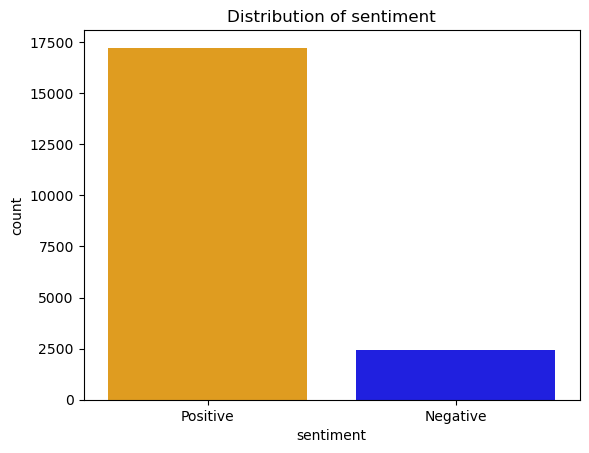

In [27]:
sns.countplot(data=df,x='sentiment',palette=['orange','blue'])
plt.title('Distribution of sentiment')
plt.show()

## Distibution of Postive and Negative Reviews by Subcategory1

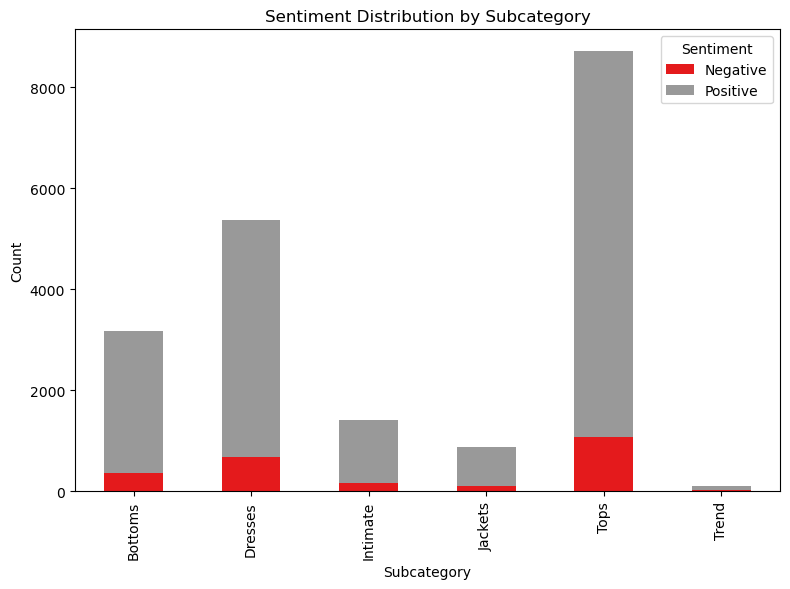

In [28]:
sb1=pd.crosstab(df['Subcategory1'],df['sentiment'])
sb1.plot(kind='bar',stacked=True,figsize=(8,6),colormap='Set1')
plt.title('Sentiment Distribution by Subcategory')
plt.xlabel('Subcategory')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

## Distibution of Postive and Negative Reviews by Location

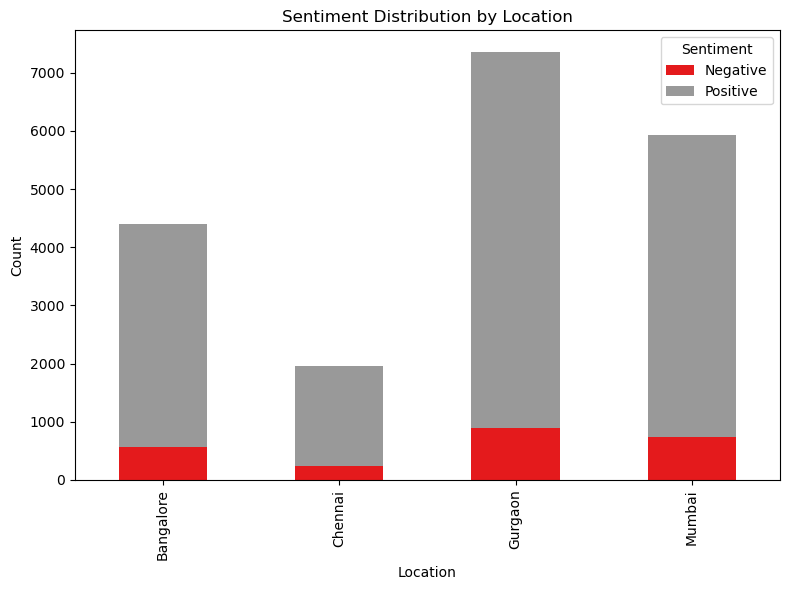

In [29]:
sb2=pd.crosstab(df['Location'],df['sentiment'])
sb2.plot(kind='bar',stacked=True,figsize=(8,6),colormap='Set1')
plt.title('Sentiment Distribution by Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

## Distibution of Postive and Negative Reviews by Channel

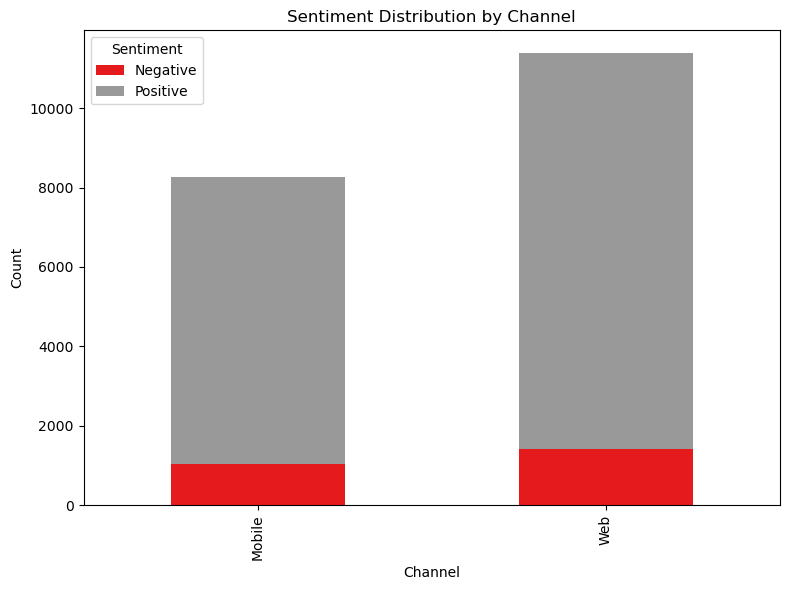

In [30]:
sb3=pd.crosstab(df['Channel'],df['sentiment'])
sb3.plot(kind='bar',stacked=True,figsize=(8,6),colormap='Set1')
plt.title('Sentiment Distribution by Channel')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

## Distibution of Postive and Negative Reviews by Age_group

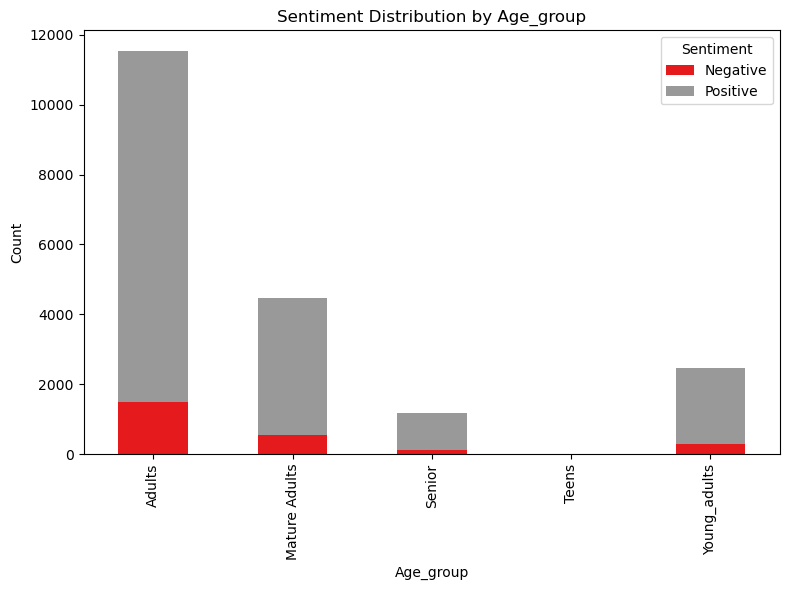

In [31]:
sb4=pd.crosstab(df['Age_group'],df['sentiment'])
sb4.plot(kind='bar',stacked=True,figsize=(8,6),colormap='Set1')
plt.title('Sentiment Distribution by Age_group')
plt.xlabel('Age_group')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

### Model Building

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19662 entries, 2 to 23485
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Product_ID      19662 non-null  object
 1   Category        19662 non-null  object
 2   Subcategory1    19662 non-null  object
 3   SubCategory2    19662 non-null  object
 4   Location        19662 non-null  object
 5   Channel         19662 non-null  object
 6   Customer_Age    19662 non-null  int64 
 7   Review_Title    19662 non-null  object
 8   Review_Text     19662 non-null  object
 9   Rating          19662 non-null  int64 
 10  Recommend_Flag  19662 non-null  object
 11  Age_group       19662 non-null  object
 12  sentiment       19662 non-null  object
dtypes: int64(2), object(11)
memory usage: 2.1+ MB


FOR MODEL BUILDING THE COLUMNS Product_ID,Review_Title,Review_Text HAS NO USE, SO DROPPING THEM

In [33]:
df_final=df.drop(columns=['Product_ID','Review_Title','Review_Text'])

In [34]:
df_final['Recommend_Flag']=df_final['Recommend_Flag'].astype(int)

### Encoding

In [35]:
df_final_1=pd.get_dummies(df_final,drop_first=True)

In [36]:
df_final_1.Recommend_Flag

2        0
3        1
4        1
5        0
6        1
        ..
23481    1
23482    1
23483    0
23484    1
23485    1
Name: Recommend_Flag, Length: 19662, dtype: int32

In [37]:
X=df_final_1[[i for i in df_final_1.columns if i != 'Recommend_Flag']] 

In [38]:
y=df_final_1['Recommend_Flag']

### Splitting data into train and test

In [39]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=123)

In [41]:
X_train.shape

(15729, 37)

In [42]:
X_test.shape

(3933, 37)

In [43]:
y_train.shape

(15729,)

In [44]:
y_test.shape

(3933,)

#### Importing Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier


In [46]:
rfc=RandomForestClassifier()

In [47]:
rfc=rfc.fit(X_train,y_train)

In [48]:
y_pred_train =rfc.predict(X_train)

In [49]:
y_pred = rfc.predict(X_test)

In [50]:
from sklearn.metrics import classification_report,confusion_matrix

### Building Classification Report for Train data

In [51]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      2842
           1       0.99      0.99      0.99     12887

    accuracy                           0.99     15729
   macro avg       0.98      0.98      0.98     15729
weighted avg       0.99      0.99      0.99     15729



### Building Classification Report for Test data

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.77      0.77       733
           1       0.95      0.95      0.95      3200

    accuracy                           0.92      3933
   macro avg       0.86      0.86      0.86      3933
weighted avg       0.92      0.92      0.92      3933



OBSERVATIONS:
This is a situation of overfitting so will use GridsearchCV to train the model

In [53]:
model1=RandomForestClassifier(random_state=123)

In [54]:
param_grid ={ 'n_estimators': [100, 200],
             'max_depth': [None, 10, 20],
             'min_samples_split': [2, 5]}

In [55]:
grc = GridSearchCV(estimator=model1, param_grid=param_grid,cv=5,n_jobs=-1,scoring='accuracy',verbose=1)

In [56]:
grc=grc.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [57]:
grc.best_params_

{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}

In [58]:
y_pred_train_m1=grc.predict(X_train)

In [59]:
y_pred_m1=grc.predict(X_test)

### Building Classification Report for Test data

In [60]:
print(classification_report(y_test,y_pred_m1))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       733
           1       0.97      0.94      0.96      3200

    accuracy                           0.93      3933
   macro avg       0.88      0.92      0.90      3933
weighted avg       0.94      0.93      0.93      3933



### Building Classification Report for Train data

In [61]:
print(classification_report(y_train,y_pred_train_m1))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      2842
           1       0.98      0.95      0.97     12887

    accuracy                           0.95     15729
   macro avg       0.90      0.94      0.92     15729
weighted avg       0.95      0.95      0.95     15729



OBESERVATIONS:
The porblem of overfitting has been solved by Gridsearchcv as the train data accuracy is amlost equals to test data accuracy.Now this model will be cosidered as best model.

In [62]:
df_final_1['predicted_recommendation_flag'] = np.append(y_pred_train_m1,y_pred_m1)

### Cross validating the model

In [63]:
from sklearn.model_selection import cross_val_score


In [64]:
scores = cross_val_score(grc, X_train, y_train, cv=5)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits


In [102]:
scores.mean()

0.9351516094831602

In [65]:
df.to_csv('Customer_Analysis.csv')